In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid")


In [2]:
loans = pd.read_csv('kiva_loans.csv')

In [3]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


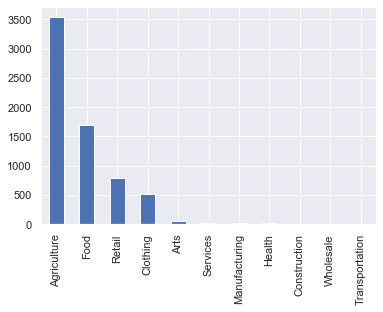

In [4]:
loans[loans.country == 'Mali'].sector.value_counts().plot(kind = 'bar')

In [5]:
mali = loans[loans.country == 'Mali']
malifood = mali[mali.sector == 'Agriculture']
malifood

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
2474,655785,375.0,375.0,Animal Sales,Agriculture,to buy small livestock,ML,Mali,Sadiobougou,XOF,78.0,2014-01-09 14:44:45+00:00,2013-12-27 08:00:00+00:00,2014-01-17 16:32:04+00:00,7.0,14,NaN,"female, female, female, female, female, female...",monthly,2014-01-09
2493,655626,1050.0,1050.0,Animal Sales,Agriculture,to buy four head of cattle.,ML,Mali,Sanankoro,XOF,78.0,2014-01-09 09:15:22+00:00,2013-12-18 08:00:00+00:00,2014-01-18 02:07:33+00:00,8.0,41,user_favorite,male,irregular,2014-01-09
2568,655793,325.0,325.0,Animal Sales,Agriculture,to buy goats,ML,Mali,Yarankabougou,XOF,78.0,2014-01-09 14:55:37+00:00,2013-12-27 08:00:00+00:00,2014-01-17 17:51:04+00:00,7.0,13,NaN,"female, female, female, female, female, female",monthly,2014-01-09
10791,663914,525.0,525.0,Animal Sales,Agriculture,to buy livestock.,ML,Mali,Wobougou,XOF,78.0,2014-01-30 10:30:34+00:00,2014-01-10 08:00:00+00:00,2014-01-31 15:37:34+00:00,6.0,7,NaN,"female, female, female, female, female",irregular,2014-01-30
18487,671067,325.0,325.0,Dairy,Agriculture,to buy milk.,ML,Mali,Nianina,XOF,78.0,2014-02-17 11:47:51+00:00,2014-01-29 08:00:00+00:00,2014-02-18 21:19:20+00:00,6.0,13,NaN,"female, female, female, female, female, female",irregular,2014-02-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663854,1326669,100.0,3050.0,Animal Sales,Agriculture,to purchase sheep to sell to be able to provid...,ML,Mali,SOUROUTOUNA,XOF,438.0,2017-06-23 10:53:14+00:00,2017-06-15 07:00:00+00:00,NaN,10.0,4,"#Parent, #Woman Owned Biz, #Schooling, #Animal...","female, female, female, female, female, female...",bullet,2017-06-23
665820,1329671,1075.0,3500.0,Animal Sales,Agriculture,to buy rams to resell with the intention of ea...,ML,Mali,sourou,XOF,438.0,2017-06-29 11:24:35+00:00,2017-06-19 07:00:00+00:00,NaN,11.0,24,"#Animals, #Repeat Borrower, user_favorite, use...","female, female, female, female, female, female...",bullet,2017-06-29
666365,1329651,0.0,3475.0,Livestock,Agriculture,to buy oxen to sell in order to pay school fee...,ML,Mali,sourou,XOF,438.0,2017-06-29 10:59:07+00:00,2017-06-19 07:00:00+00:00,NaN,11.0,0,NaN,"male, male, male, male, male, male, male, male",bullet,2017-06-29
666441,1329714,250.0,3050.0,Animal Sales,Agriculture,to buy sheep to resell in order to feed her fa...,ML,Mali,sourou,XOF,438.0,2017-06-29 12:30:34+00:00,2017-06-23 07:00:00+00:00,NaN,10.0,10,"#Animals, #Repeat Borrower, #Parent","female, female, female, female, female, female...",bullet,2017-06-29


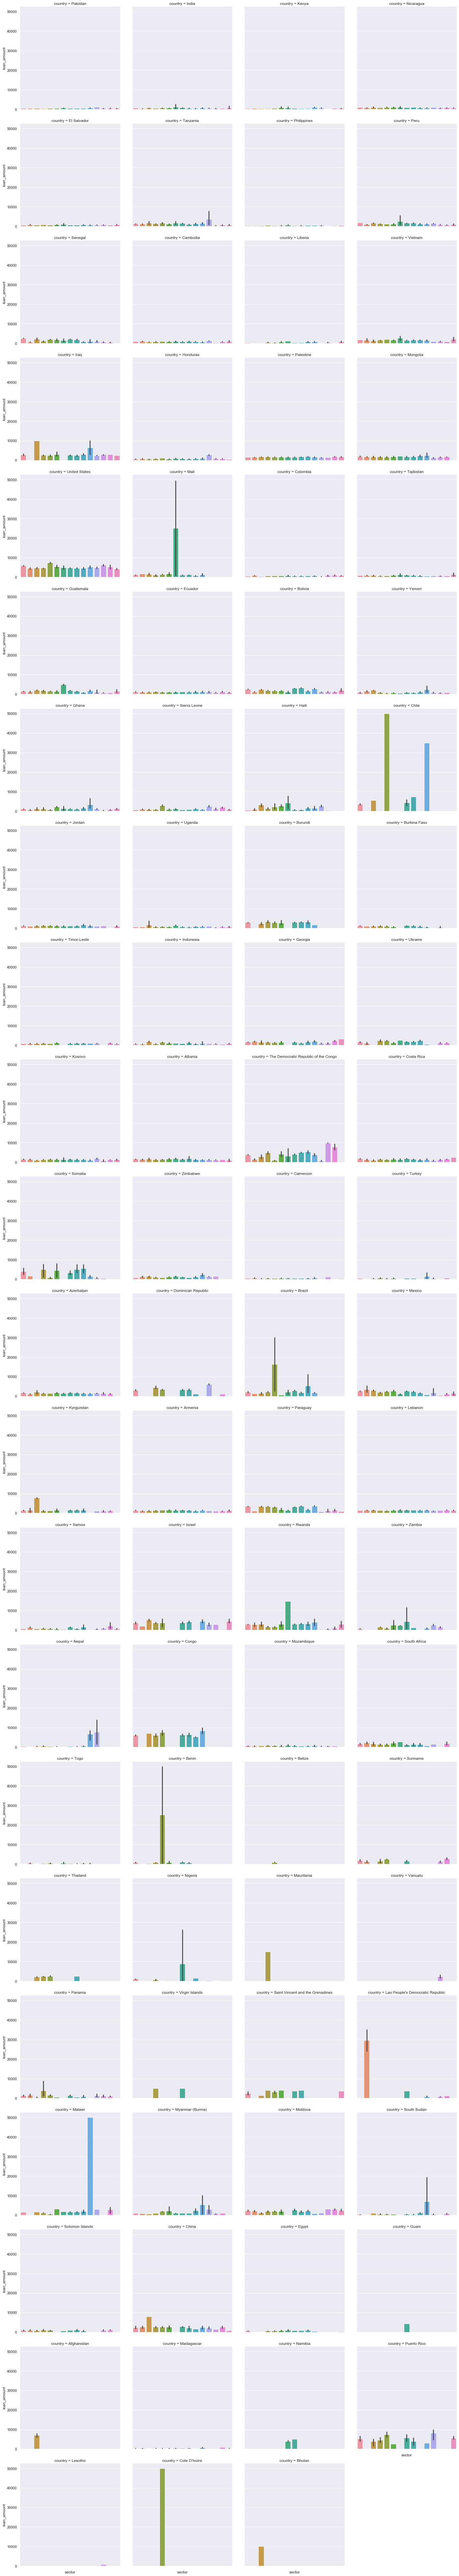

In [6]:
chart = sns.catplot(x = 'sector', y = 'loan_amount', col = 'country', kind = 'bar', data = loans, col_wrap = 4)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

# Loan Borrowers by Gender

We can see that females make up 63% of the entire borrower populace and have a wider loan distribution as compared to men and groups.

In [7]:
"""show the percentage of borrowers by gender"""
loans.borrower_genders.value_counts(True)

female                                                                                                                                                                                                  0.639449
male                                                                                                                                                                                                    0.201969
female, female                                                                                                                                                                                          0.018237
female, female, female                                                                                                                                                                                  0.017506
female, female, female, female                                                                                                                                      

In [8]:
"""Change borrowers with multiple people into groups"""
def gender (x):
    if x['borrower_genders'] == 'female' :
        return 'female'
    elif x['borrower_genders'] == 'male':
        return 'male'
    else:
        return 'group'

loans['gender'] = loans.apply (lambda loans: gender(loans), axis=1)

In [9]:
loans.loan_amount.describe()

count    671205.000000
mean        842.397107
std        1198.660073
min          25.000000
25%         275.000000
50%         500.000000
75%        1000.000000
max      100000.000000
Name: loan_amount, dtype: float64

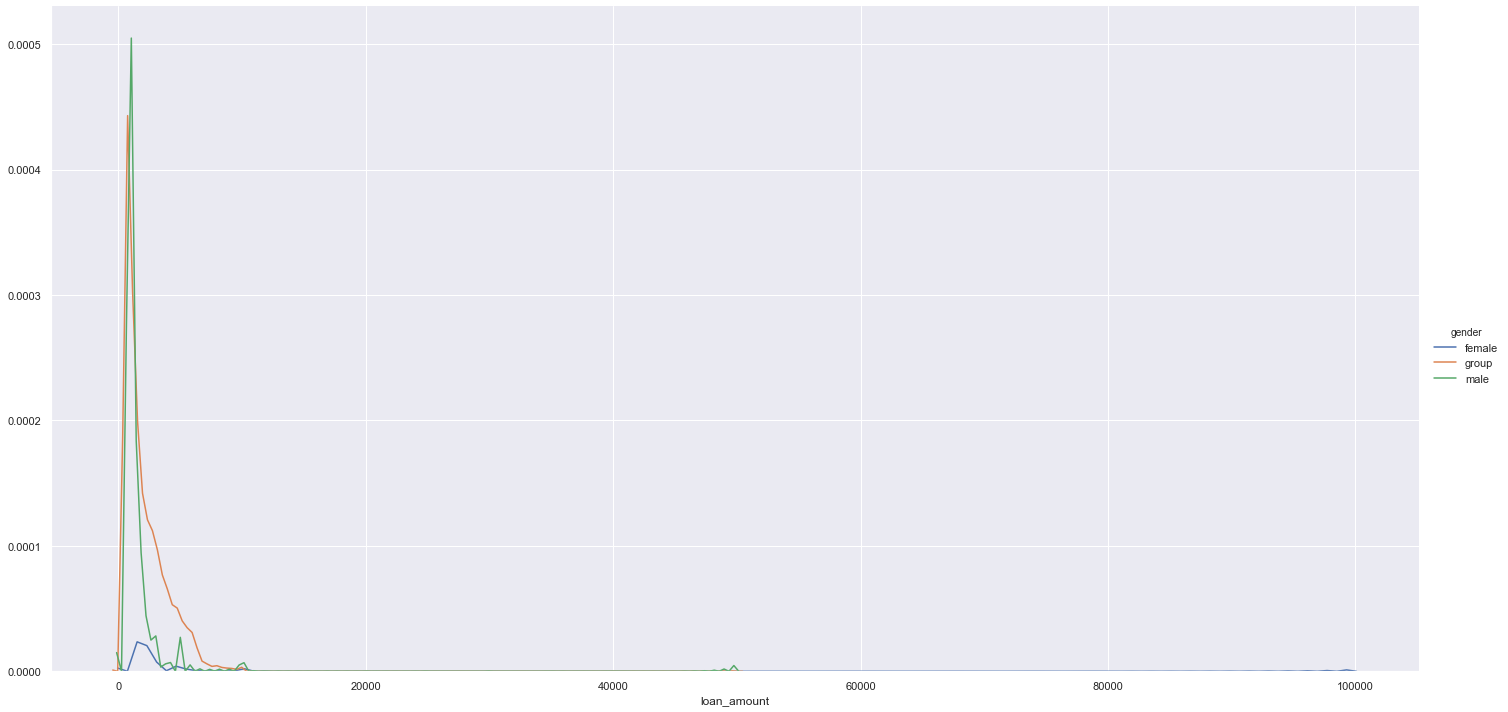

In [10]:
"""Women have a wider loan distribution where as groups and men are more centered at the lower end of the distribution"""
g = sns.FacetGrid(loans, hue="gender", height = 10, aspect = 2)
g.map(sns.kdeplot, 'loan_amount').add_legend()
plt.show()

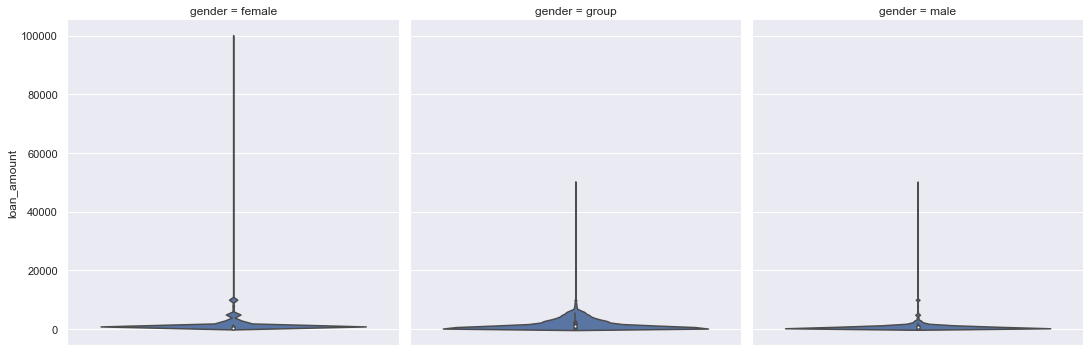

In [11]:
sns.catplot(y = 'loan_amount', col = 'gender', data = loans, kind = 'violin', col_wrap = 4)

# Borrowers by Countries

There is a difference between the number of borrowers per country, and the sum of loans borrowed per country. 

The country with the highest number of borrowers & loan sum is Philippines, followed by Kenya. However in loan sum, United States comes in third.

Haiti has the highest loan amount borrowed at 10,000 USD to create more than 300 jobs for women and farmers in the agriculture sector.

Top 3 loan amounts in Philippines are for the purpose of purchasing fair-trade coffee in the agriculture sector, and to pay for expansion of operations and staff in the education sector


Text(0.5, 1.0, 'Number of Loans per Country')

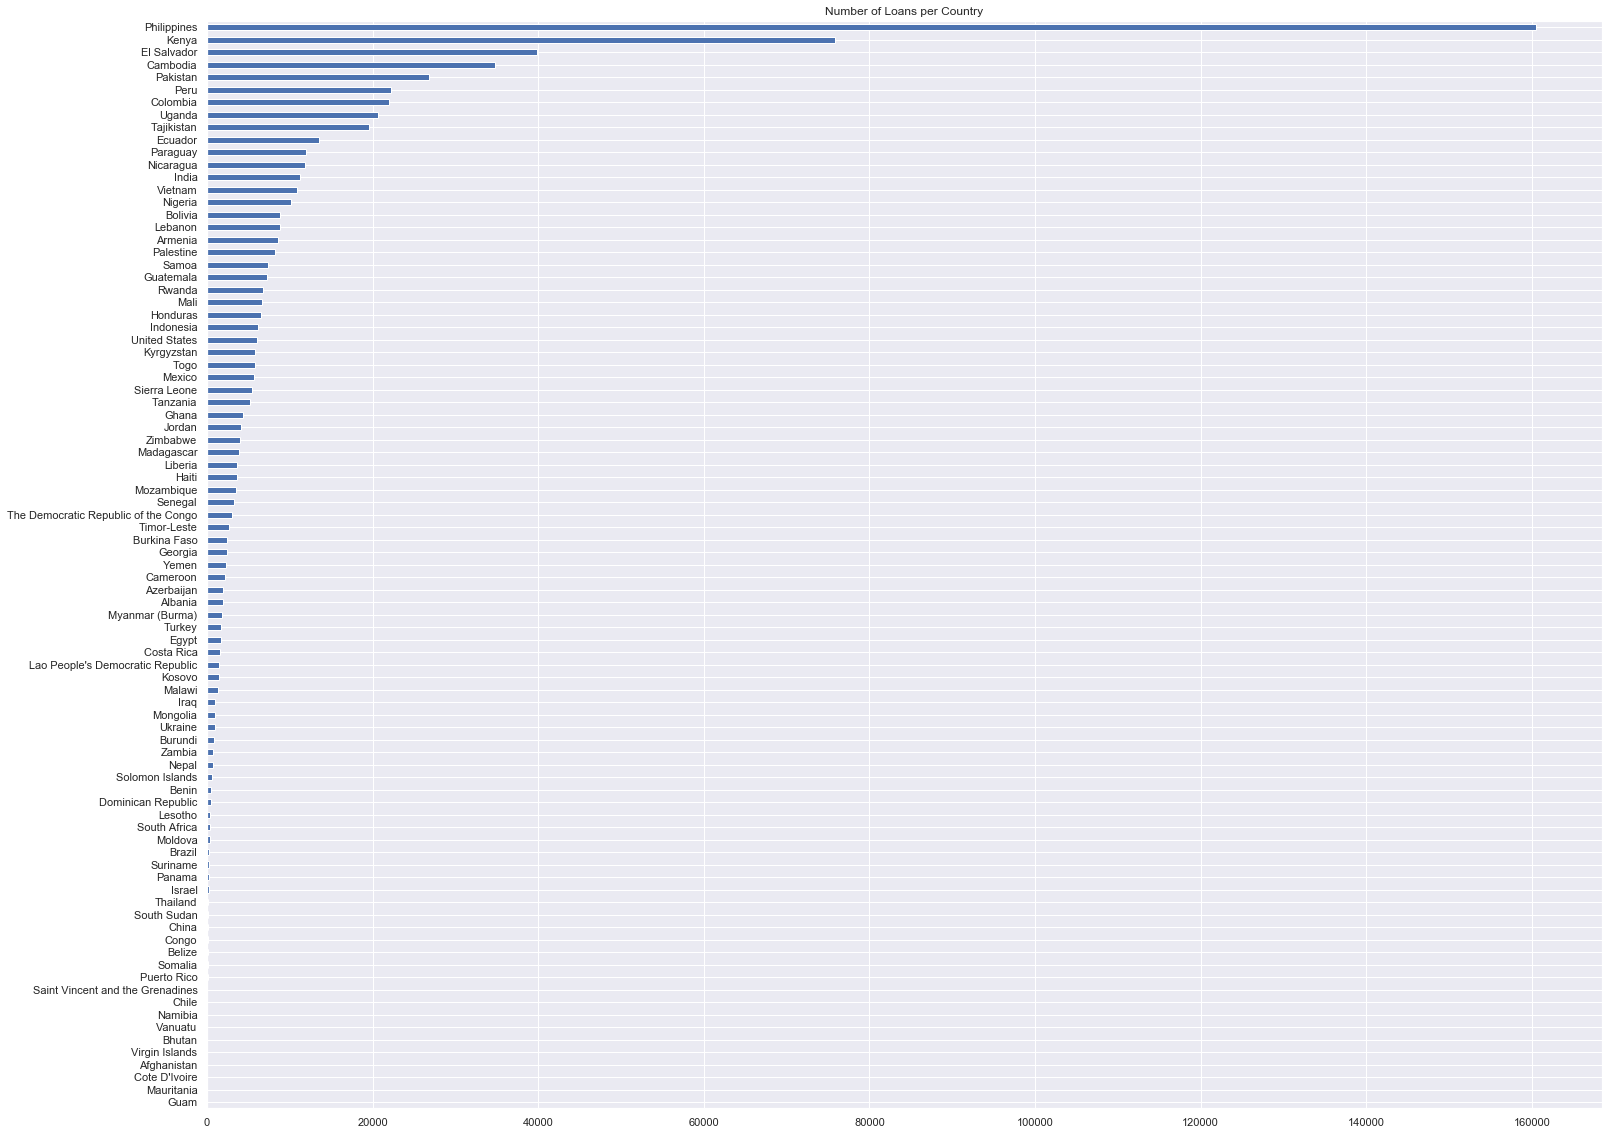

In [12]:
loans.country.value_counts(ascending = True).plot(kind = 'barh', figsize=(25, 20))
plt.title('Number of Loans per Country')

Text(0.5, 1.0, 'Loan amount per Country')

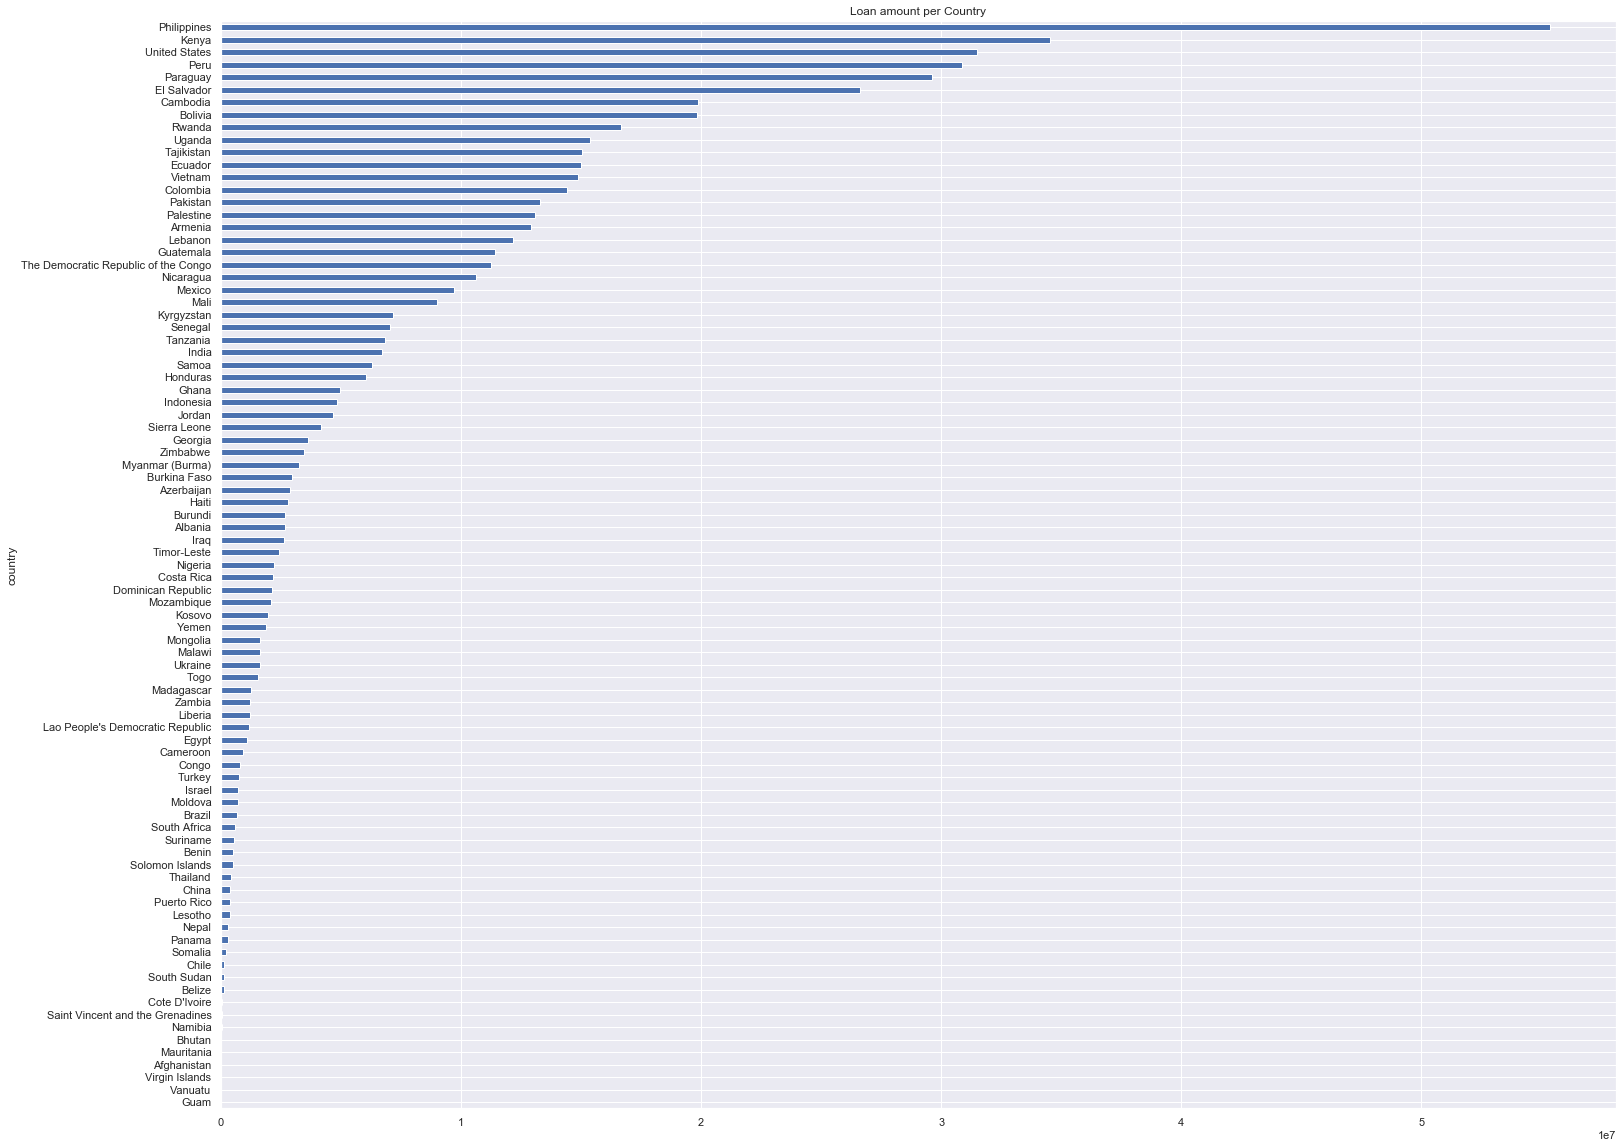

In [13]:
loans.groupby('country').loan_amount.sum().sort_values(ascending = True).plot(kind = 'barh', figsize=(25, 20))
plt.title('Loan amount per Country')

In [14]:
#print(loans[loans.loan_amount > 50000])
loans.loc[[70499]]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender
70499,722883,100000.0,100000.0,Agriculture,Agriculture,create more than 300 jobs for women and farmer...,HT,Haiti,Les Cayes,USD,...,2014-06-10 19:25:02+00:00,2014-09-08 07:00:00+00:00,2014-06-19 20:21:04+00:00,75.0,2986,"user_favorite, user_favorite, user_favorite, u...",female,irregular,2014-06-10,female


In [15]:
"""Highest loan amount from Philippines"""
#loans[loans.country == 'Philippines'].loan_amount.sort_values(ascending = False)
loans.loc[[543706, 273601, 121246]]

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,gender
543706,1204350,25000.0,25000.0,Agriculture,Agriculture,to purchase fair-trade coffee from 290 Filipin...,PH,Philippines,Benguet & Bukidnon,USD,...,2016-12-15 13:47:34+00:00,2017-01-31 08:00:00+00:00,2017-01-18 05:37:04+00:00,14.0,747,"#Sustainable Ag, #Job Creator, #Woman Owned Bi...",female,irregular,2016-12-15,female
273601,920614,13275.0,13275.0,Education provider,Education,to pay for expansion of operations and staff e...,PH,Philippines,"Bago, Negros Occidental",PHP,...,2015-07-21 09:57:58+00:00,2015-07-07 07:00:00+00:00,2015-08-19 17:41:55+00:00,24.0,432,"#Job Creator, user_favorite, user_favorite, us...",male,monthly,2015-07-21,male
121246,772395,10100.0,10100.0,Education provider,Education,to pay for expansion of operations and staff e...,PH,Philippines,"Bago, Negros Occidental",PHP,...,2014-09-21 11:05:44+00:00,2014-08-28 07:00:00+00:00,2014-10-18 19:47:13+00:00,15.0,337,"user_favorite, #Unique, #Job Creator, #Schooli...",male,irregular,2014-09-21,male


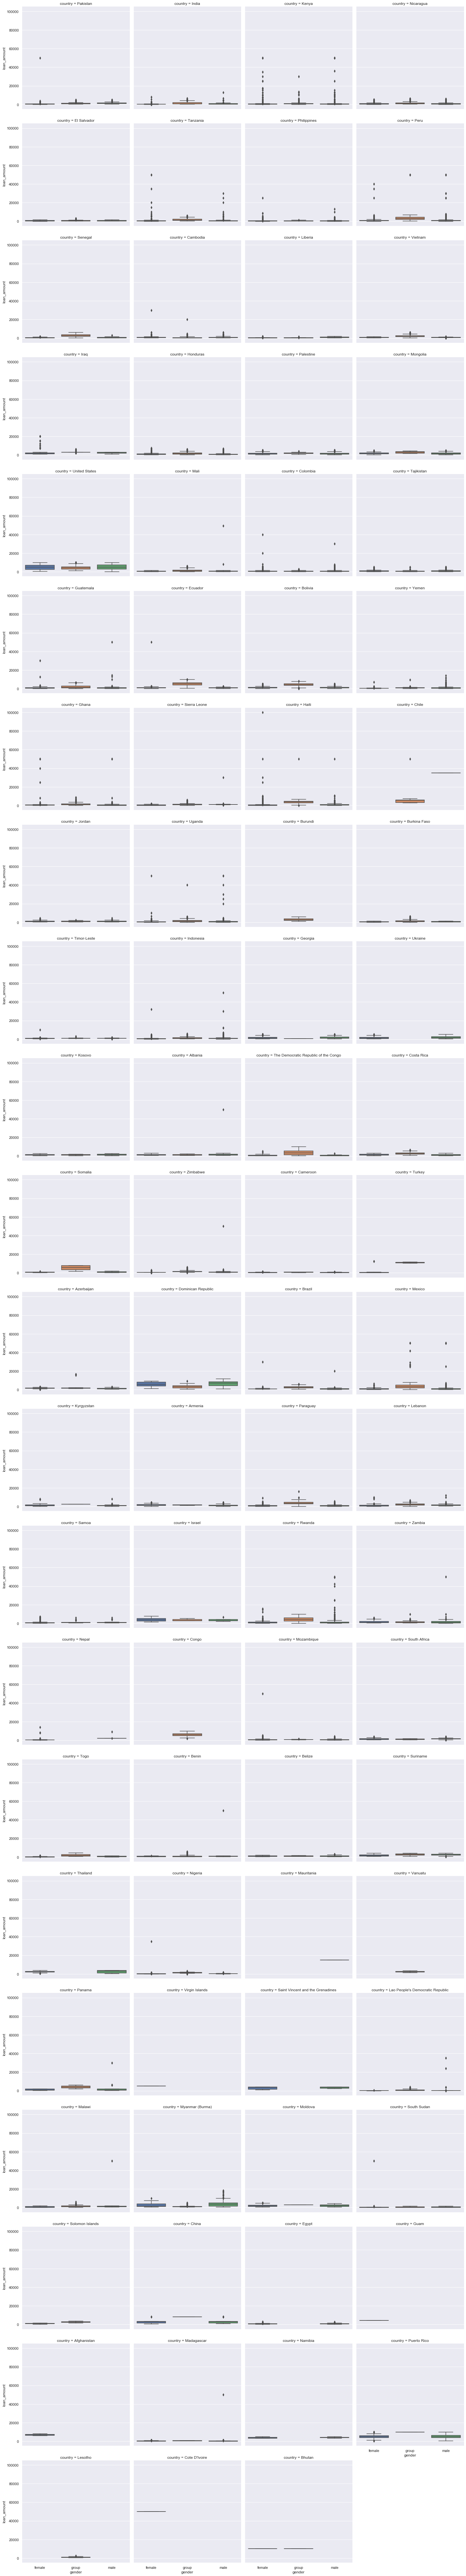

In [16]:
sns.catplot(y = 'loan_amount', x = 'gender', col = 'country', kind = 'box', data = loans, col_wrap = 4)

# Borrowers by Sector

Agriculture is the highest in terms of number of loans, followed by food and then retail sector.

However in terms of loan amount, the entertainment sector is number 1 and whoesale at 2. This is not reflected if the loan borrowers are in groups.

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64

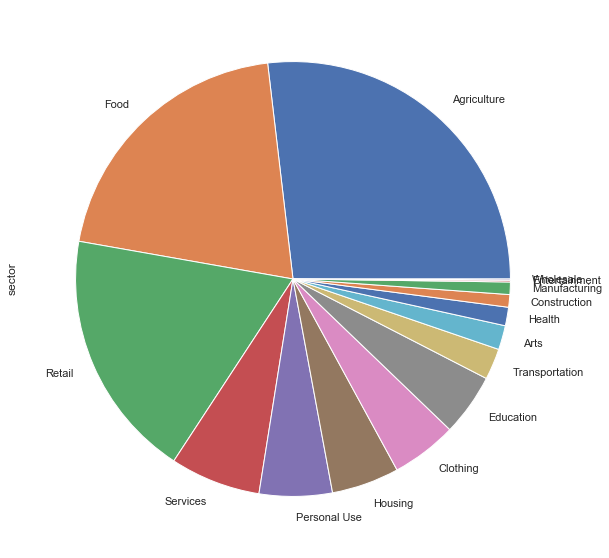

In [17]:
loans.sector.value_counts().plot.pie(figsize = (10,10))
loans.sector.value_counts()

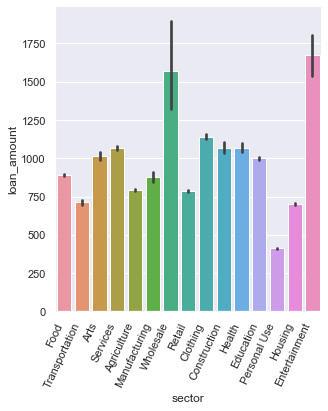

In [18]:
chart = sns.catplot(x = 'sector', y = 'loan_amount', kind = 'bar', data = loans)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

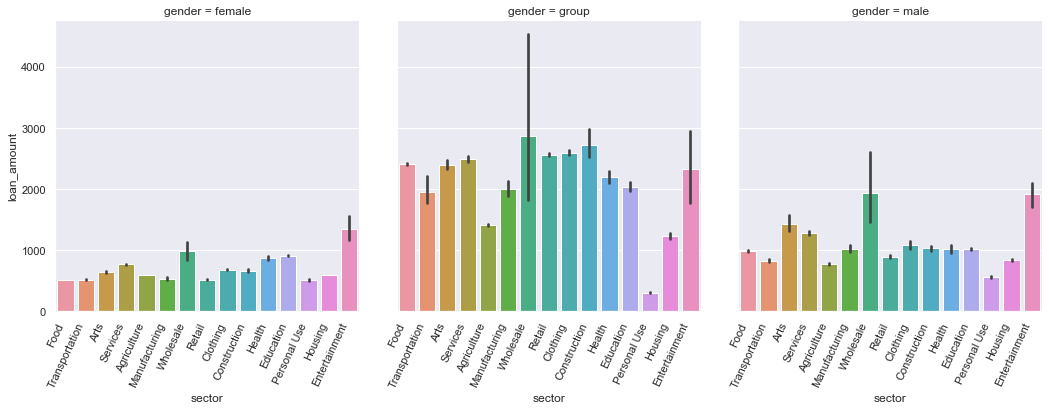

In [19]:
chart = sns.catplot(x = 'sector', y = 'loan_amount', kind = 'bar', col = "gender", data = loans)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

# Repayment Intervals

Only Kenya has weekly Repayment intervals

Philippines have the highest irregular repayment interval

In general, monthly repayment plans are taken mostly followed by irregular

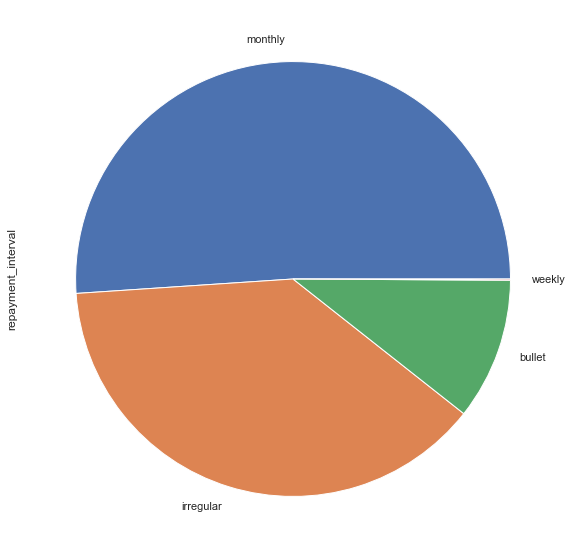

In [20]:
loans.repayment_interval.value_counts().plot.pie(figsize = (10,10))

In [21]:
gender_repayment = ['gender', 'repayment_interval']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(loans[gender_repayment[0]], loans[gender_repayment[1]]).style.background_gradient(cmap = cm)

repayment_interval,bullet,irregular,monthly,weekly
gender,,,,
female,22153,210069,193709,571
group,19506,29088,61399,0
male,29069,18001,87609,31


In [22]:
sector_repayment = ['sector', 'repayment_interval']
pd.crosstab(loans[sector_repayment[0]], loans[sector_repayment[1]]).style.background_gradient(cmap = cm)

repayment_interval,bullet,irregular,monthly,weekly
sector,,,,
Agriculture,43963,47524,88776,39
Arts,1475,4636,5934,15
Clothing,1048,13559,17997,138
Construction,294,1549,4414,11
Education,2437,4351,24225,0
Entertainment,155,226,449,0
Food,4607,75914,56039,97
Health,138,1659,7413,13
Housing,880,8451,24400,0


In [23]:
country_repayment = ['country', 'repayment_interval']
pd.crosstab(loans[country_repayment[0]], loans[country_repayment[1]]).style.background_gradient(cmap = cm)

repayment_interval,bullet,irregular,monthly,weekly
country,,,,
Afghanistan,2,0,0,0
Albania,23,26,1885,0
Armenia,43,170,8418,0
Azerbaijan,0,12,1933,0
Belize,0,0,125,0
Benin,1,40,456,0
Bhutan,0,2,0,0
Bolivia,39,1231,7536,0
Brazil,14,181,89,0


# Map View of Locations(region) of Loans

In [24]:
import folium
from folium.plugins import MarkerCluster


loc = pd.read_csv('kiva_mpi_region_locations.csv')
loc2 = loc.dropna(subset=['lat', 'lon'])

loc2.dtypes

LocationName     object
ISO              object
country          object
region           object
world_region     object
MPI             float64
geo              object
lat             float64
lon             float64
dtype: object

In [25]:
m = folium.Map(zoom_start = 10, tiles='cartodbpositron')

marker_cluster = MarkerCluster(name='loans in region').add_to(m)

for i in loc2[0:len(loc2)].iterrows():
    folium.CircleMarker(location=[i [1]['lat'], i [1]['lon']], popup = i [1]['LocationName'], radius=1, color='#3186cc', fill_color='#3186cc').add_to(marker_cluster) 

In [26]:
m

In [27]:
m.save('kiva loans by region.html')

# Additional: ML Classifier of number of lenders based on Tags

In [113]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()

In [119]:
#Adding labels to the dataframe

loans2 = loans.dropna()
loans2['labels'] = loans2['lender_count'].apply(lambda x: 'more than 10' if x > 10 else '10 and below')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
x_train, x_test, y_train, y_test = train_test_split(loans2.tags, loans2.labels, test_size = 0.2)
count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(x_train)
x_test_counts = count_vect.fit_transform(x_test)

In [177]:
"""Using Naive Bayes"""
clf = MultinomialNB().fit(x_train_counts, y_train)
clf.fit(x_test_counts, y_test)
predicted = clf.predict(x_test_counts)
np.mean(predicted == y_test)  

0.6662609168370422

In [181]:
"""Using SVG"""

"""SVG has a higher score than Bayes but I think Bayes might be a better method here as 
\the tags are mostly individualistic in nature. Also with only a 65+-% score, this feature is not really something that
\would work well."""

from sklearn.linear_model import SGDClassifier
clf2 = SGDClassifier().fit(x_train_counts, y_train)
clf2.fit(x_test_counts, y_test)
predicted2 = clf2.predict(x_test_counts)
np.mean(predicted2 == y_test)  

0.6870605197537137

In [182]:
"""Also testing out to see if gender has any role to play with the number of lenders and 65% is not very conclusive"""

x1_train, x1_test, y1_train, y1_test = train_test_split(loans2.borrower_genders, loans2.labels, test_size = 0.2)
x1_train_counts = count_vect.fit_transform(x1_train)
x1_test_counts = count_vect.fit_transform(x1_test)

clf3 = MultinomialNB().fit(x1_train_counts, y1_train)
clf3.fit(x1_test_counts, y1_test)

predicted3 = clf3.predict(x1_test_counts)
np.mean(predicted3 == y1_test)  

0.6524339080799366

In [184]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))
print(metrics.classification_report(y1_test, predicted))

              precision    recall  f1-score   support

10 and below       0.51      0.33      0.40     28537
more than 10       0.71      0.84      0.77     56080

    accuracy                           0.67     84617
   macro avg       0.61      0.58      0.58     84617
weighted avg       0.64      0.67      0.64     84617

              precision    recall  f1-score   support

10 and below       0.34      0.22      0.26     28517
more than 10       0.66      0.78      0.72     56100

    accuracy                           0.59     84617
   macro avg       0.50      0.50      0.49     84617
weighted avg       0.55      0.59      0.57     84617

